In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
groceries = []

In [3]:
with open("groceries.csv") as x:
    groceries = x.read()

In [4]:
groceries

'citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,\ntropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nwhole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\npip fruit,yogurt,cream cheese ,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nother vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nwhole milk,butter,yogurt,rice,abrasive cleaner,,,,,,,,,,,,,,,,,,,,,,,,,,,\nrolls/buns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),,,,,,,,,,,,,,,,,,,,,,,,,,,\npot plants,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nwhole milk,cereals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\ntropical fruit,other vegetables,white bread,bottled water,chocolate,,,,,,,,,,,,,,,,,,,,,,,,,,,\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes,,,,,,,,,,,,,,,,,,,,,,,\nbeef,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nfrankfurter,rolls/buns,soda,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nchicken,tropical fruit,,,,,,,,,,,,,

In [5]:
#Splitting the data

In [6]:
groceries = groceries.split("\n")

In [7]:
groceries

['citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'tropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'whole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'pip fruit,yogurt,cream cheese ,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'whole milk,butter,yogurt,rice,abrasive cleaner,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'rolls/buns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'pot plants,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'whole milk,cereals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes,,,,,,,,,,,,,,,,,,,,,,,',
 'beef,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'frankfurter,rolls/buns,soda,,,,,,,,,,,,,,,,,,,,,,,,,,

In [8]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [9]:
groceries_list

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['tropical fruit',
  'yogurt',
  'coffee',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['whole milk',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['pip fruit',
  'yogurt',
  'cream cheese ',
  'meat spreads',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product',
  '',
  '',
 

In [10]:
# Storing all groceries in a list

In [14]:
all_groceries = [product for transaction in groceries_list for product in transaction]
len(all_groceries)

314721

In [12]:
all_groceries

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'tropical fruit',
 'yogurt',
 'coffee',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'whole milk',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'pip fruit',
 'yogurt',
 'cream cheese ',
 'meat spreads',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'whole m

In [16]:
from collections import Counter
from collections import OrderedDict

item_frequency=Counter(all_groceries)

In [17]:
item_frequency

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         '': 271354,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/veget

In [18]:
#Sorting
item_frequency=sorted(item_frequency.items(), key = lambda x:x[1]) 
print(item_frequency)
len(item_frequency)

[('baby food', 1), ('sound storage medium', 1), ('preservation products', 2), ('bags', 4), ('kitchen utensil', 4), ('baby cosmetics', 6), ('frozen chicken', 6), ('toilet cleaner', 7), ('make up remover', 8), ('salad dressing', 8), ('whisky', 8), ('liqueur', 9), ('rubbing alcohol', 10), ('hair spray', 11), ('frozen fruits', 12), ('cream', 13), ('honey', 15), ('decalcifier', 15), ('organic products', 16), ('specialty vegetables', 17), ('ready soups', 18), ('flower soil/fertilizer', 19), ('prosecco', 20), ('cocoa drinks', 22), ('organic sausage', 22), ('pudding powder', 23), ('tidbits', 23), ('cooking chocolate', 25), ('soap', 26), ('bathroom cleaner', 27), ('cookware', 27), ('potato products', 28), ('fish', 29), ('snack products', 30), ('nut snack', 31), ('artif. sweetener', 32), ('canned fruit', 32), ('syrup', 32), ('nuts/prunes', 33), ('abrasive cleaner', 35), ('skin care', 35), ('specialty fat', 36), ('tea', 38), ('brandy', 41), ('light bulbs', 41), ('meat spreads', 42), ('ketchup', 4

170

In [22]:
#Split products and its frequency

frequency = list(reversed([i[1] for i in item_frequency]))
items = list(reversed([i[0] for i in item_frequency]))

print(len(frequency))
print(len(items))
#print(items)
#print(frequency)

170
170


In [25]:
#Top 10 products
print(frequency[0:10])
print(items[0:10])

[271354, 2513, 1903, 1809, 1715, 1372, 1087, 1072, 1032, 969]
['', 'whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags']


In [26]:
#deleting space and its count
del frequency[0]

In [27]:
del items[0]

In [28]:
print(frequency[0:10])
print(items[0:10])

[2513, 1903, 1809, 1715, 1372, 1087, 1072, 1032, 969, 924]
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage']


<ipython-input-32-9b9c796ee964>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar (items[0:10],height = frequency[0:10],color='rgbkymc')


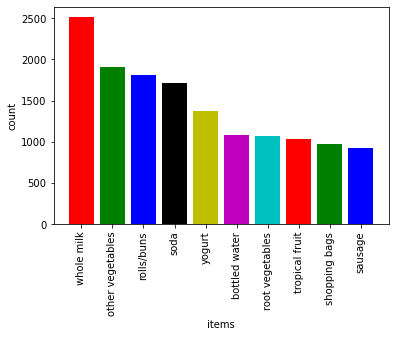

In [32]:
# Visualization of top 10 products 

plt.bar (items[0:10],height = frequency[0:10],color='rgbkymc')
plt.xticks(list(range(0,10),),items[0:10], rotation = 90)
plt.xlabel("items")
plt.ylabel("count")
plt.show()

In [33]:
# From the graph we can see that whole milk is purchased by many users many times

In [35]:
groceries_series  = pd.DataFrame(pd.Series(groceries_list))

In [36]:
groceries_series.columns = ["transactions"]

In [37]:
groceries_series["transactions"]

0       [citrus fruit, semi-finished bread, margarine,...
1       [tropical fruit, yogurt, coffee, , , , , , , ,...
2       [whole milk, , , , , , , , , , , , , , , , , ,...
3       [pip fruit, yogurt, cream cheese , meat spread...
4       [other vegetables, whole milk, condensed milk,...
                              ...                        
9831    [cooking chocolate, , , , , , , , , , , , , , ...
9832    [chicken, citrus fruit, other vegetables, butt...
9833    [semi-finished bread, bottled water, soda, bot...
9834    [chicken, tropical fruit, other vegetables, vi...
9835                                                   []
Name: transactions, Length: 9836, dtype: object

In [38]:
# removing the last empty transaction
groceries_series = groceries_series.iloc[:9835,:] 

In [ ]:
groceries_series["transactions"]

In [40]:
X = groceries_series['transactions'].str.join(sep='*')
print(X)

# create dummy variable for each 
X= X.str.get_dummies(sep='*')
X.head()

0       citrus fruit*semi-finished bread*margarine*rea...
1       tropical fruit*yogurt*coffee******************...
2               whole milk*******************************
3       pip fruit*yogurt*cream cheese *meat spreads***...
4       other vegetables*whole milk*condensed milk*lon...
                              ...                        
9830    sausage*chicken*beef*hamburger meat*citrus fru...
9831     cooking chocolate*******************************
9832    chicken*citrus fruit*other vegetables*butter*y...
9833    semi-finished bread*bottled water*soda*bottled...
9834    chicken*tropical fruit*other vegetables*vinega...
Name: transactions, Length: 9835, dtype: object


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
#Taking support as 0.1
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

In [44]:
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(yogurt, whole milk, soda)"
985,0.007931,"(tropical fruit, whole milk, whipped/sour cream)"
986,0.006202,"(tropical fruit, yogurt, whipped/sour cream)"
987,0.015150,"(yogurt, whole milk, tropical fruit)"


In [45]:
# Frequent item based on support in decending order
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets

,support,itemsets
117,0.255516,(whole milk)
73,0.193493,(other vegetables)
88,0.183935,(rolls/buns)
98,0.174377,(soda)
118,0.139502,(yogurt)
...,...,...
874,0.005084,"(whole milk, tropical fruit, newspapers)"
276,0.005084,"(chewing gum, whole milk)"
332,0.005084,"(frankfurter, coffee)"
346,0.005084,"(curd, cream cheese )"


In [46]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2559,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2558,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
2021,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
2020,"(butter, other vegetables)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1312,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
1313,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596
2042,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2043,(onions),"(root vegetables, other vegetables)",0.031012,0.047382,0.005694,0.183607,3.875044,0.004225,1.166862
2206,(tropical fruit),"(pip fruit, citrus fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688
2203,"(pip fruit, citrus fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831


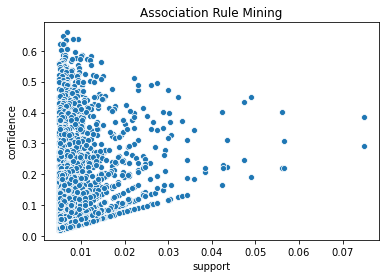

In [48]:
import seaborn as sns
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

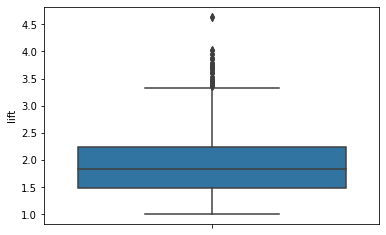

In [49]:
# Box plot
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

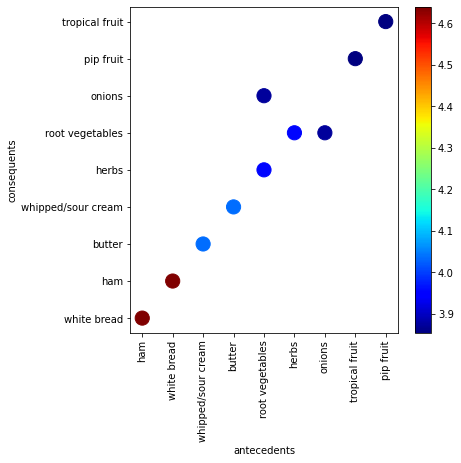

In [50]:
# Top 10

A = rules.antecedents.iloc[0:10]
B = rules.consequents.iloc[0:10]
C = rules.lift.iloc[0:10]

# abovecode give frozen set error so change A & B:

A = A.apply(lambda x: list(x)[0]).astype("unicode")
B = B.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc = plt.scatter(A,B, s = 200, c=C, cmap=plt.cm.jet)
cbar = fig.colorbar(sc, orientation='vertical')    
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.xticks(rotation=90)
plt.show()

# Different values of support conf and length

In [51]:
Y = groceries_series['transactions'].str.join(sep='*')
Y= Y.str.get_dummies(sep='*')
Y.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
# support 0.01

frequent_itemsets = apriori(Y, min_support=0.01,max_len= None,use_colnames = True)
# Most Frequent item sets based on support in decending order
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
print(frequent_itemsets)

      support                    itemsets
86   0.255516                (whole milk)
55   0.193493          (other vegetables)
66   0.183935                (rolls/buns)
75   0.174377                      (soda)
87   0.139502                    (yogurt)
..        ...                         ...
178  0.010066      (frankfurter, sausage)
306  0.010066  (whole milk, curd, yogurt)
160  0.010066          (curd, rolls/buns)
212  0.010066   (tropical fruit, napkins)
199  0.010066   (whole milk, hard cheese)

[333 rows x 2 columns]


In [57]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
590,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
587,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
533,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
532,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
573,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
576,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
369,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776
368,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
173,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
172,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366


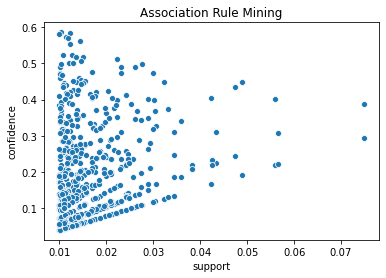

In [58]:

sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

In [65]:
A = rules.antecedents.iloc[0:10]
B = rules.consequents.iloc[0:10]
C = rules.lift.iloc[0:10]

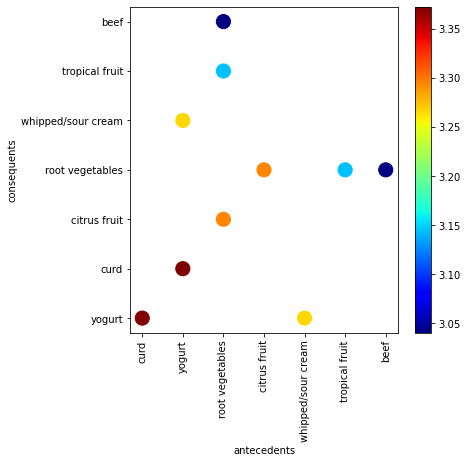

In [67]:
A1 = A.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()